In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/WaTheDarknest/CSI/main/Dataset/Dataset/TX1(%E0%B8%AB%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%9B%E0%B8%81%E0%B8%95%E0%B8%B4)(10Sec).csv'
dataset=pd.read_csv(url)
dataset

,real_timestamp,Zone,R1,I1,Mag1,R2,I2,Mag2,R3,I3,...,Mag61,R62,I62,Mag62,R63,I63,Mag63,R64,I64,Mag64
0,0.635934,1,28,-64,69.856997,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.642724,1,-99,-48,110.022725,9,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.656791,1,-121,112,164.878743,8,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.668472,1,-122,-31,125.876924,23,0,23,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.691587,1,-122,-31,125.876924,23,0,23,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,9.958590,4,84,-64,105.603030,4,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2924,9.969810,4,84,-64,105.603030,4,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2925,9.982930,4,84,-64,105.603030,4,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2926,9.991450,4,84,-64,105.603030,4,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree

feature_cols=['Mag1', 'Mag2', 'Mag3', 'Mag4', 'Mag5', 'Mag6', 'Mag7', 'Mag8',
         'Mag9', 'Mag10', 'Mag11', 'Mag12', 'Mag13', 'Mag14', 'Mag15', 'Mag16',
       'Mag17', 'Mag18', 'Mag19', 'Mag20', 'Mag21', 'Mag22', 'Mag23', 'Mag24',
       'Mag25', 'Mag26', 'Mag27', 'Mag28', 'Mag29', 'Mag30', 'Mag31', 'Mag32',
       'Mag33', 'Mag34', 'Mag35', 'Mag36', 'Mag37', 'Mag38', 'Mag39', 'Mag40',
       'Mag41', 'Mag42', 'Mag43', 'Mag44', 'Mag45', 'Mag46', 'Mag47', 'Mag48',
       'Mag49', 'Mag50', 'Mag51', 'Mag52', 'Mag53', 'Mag54', 'Mag55', 'Mag56',
       'Mag57', 'Mag58', 'Mag59', 'Mag60', 'Mag61', 'Mag62', 'Mag63', 'Mag64']
target_col='Zone'
X=dataset[feature_cols]
y=dataset[target_col]

test_size=0.5
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size, random_state=5)

In [6]:
model = tree.DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [7]:
params={'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
#  'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}
model=tree.DecisionTreeClassifier(**params)

In [8]:
model = model.fit(X_train, y_train)
model

DecisionTreeClassifier(max_depth=3)

In [10]:
# แสดงค่าความสำคัญของเเต่ละ feature
fs = pd.Series(model.feature_importances_, index=X_train.columns.sort_values(ascending=True))
fs

Mag1     0.000000
Mag10    0.008313
Mag11    0.000000
Mag12    0.000000
Mag13    0.000000
           ...   
Mag63    0.000000
Mag64    0.000000
Mag7     0.000000
Mag8     0.000000
Mag9     0.000000
Length: 64, dtype: float64

In [11]:
model.score(X_train, y_train)

0.5546448087431693

In [12]:
model.score(X_test, y_test)

0.5102459016393442

In [13]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 3,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Mag1', 'Mag2', 'Mag3', 'Mag4', 'Mag5', 'Mag6', 'Mag7', 'Mag8',
        'Mag9', 'Mag10', 'Mag11', 'Mag12', 'Mag13', 'Mag14', 'Mag15',
        'Mag16', 'Mag17', 'Mag18', 'Mag19', 'Mag20', 'Mag21', 'Mag22',
        'Mag23', 'Mag24', 'Mag25', 'Mag26', 'Mag27', 'Mag28', 'Mag29',
        'Mag30', 'Mag31', 'Mag32', 'Mag33', 'Mag34', 'Mag35', 'Mag36',
        'Mag37', 'Mag38', 'Mag39', 'Mag40', 'Mag41', 'Mag42', 'Mag43',
        'Mag44', 'Mag45', 'Mag46', 'Mag47', 'Mag48', 'Mag49', 'Mag50',
        'Mag51', 'Mag52', 'Mag53', 'Mag54', 'Mag55', 'Mag56', 'Mag57',
        'Mag58', 'Mag59', 'Mag60', 'Mag61', 'Mag62', 'Mag63', 'Mag64'],
       dtype=object),
 'n_features_in_': 64,
 'n_out

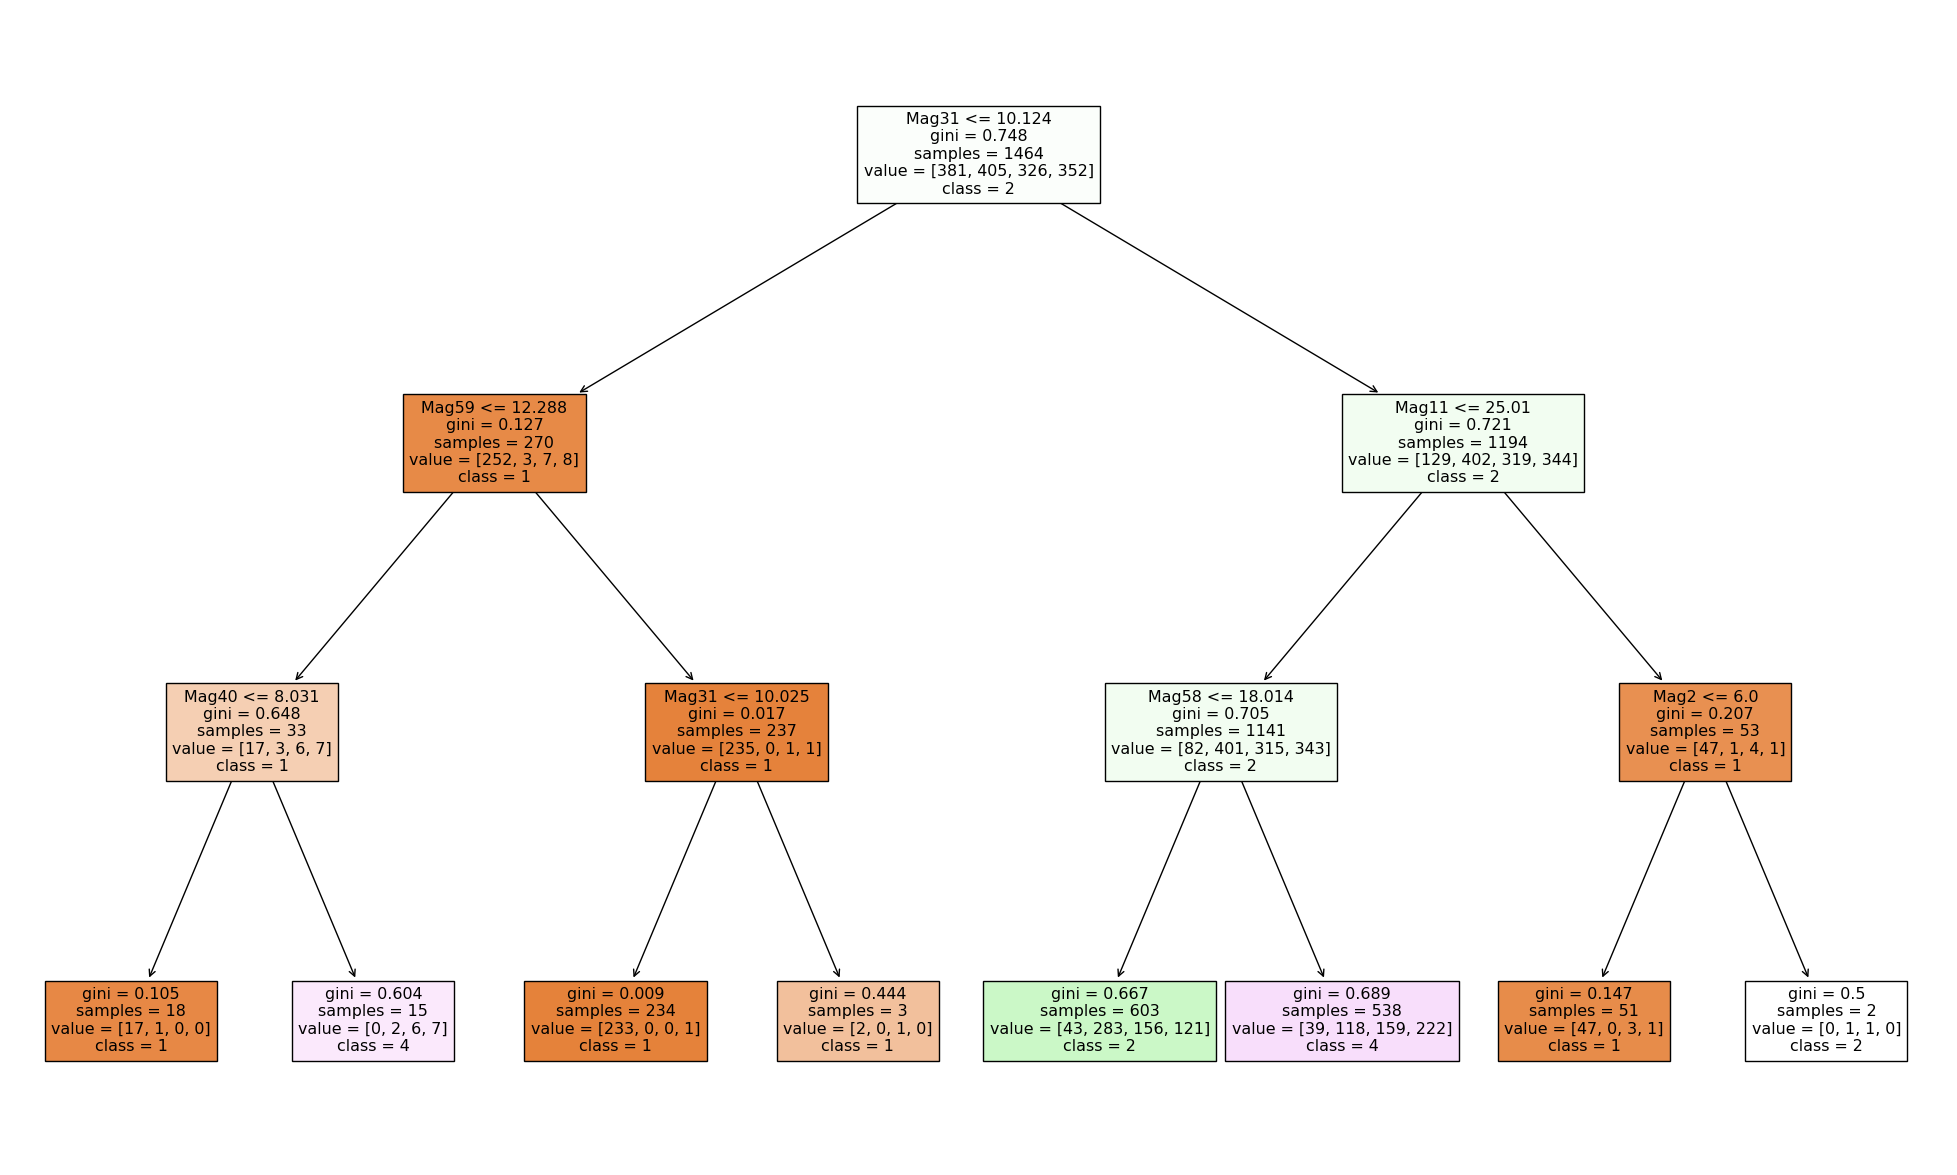

In [15]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(model,feature_names= feature_cols,class_names=['1','2','3','4'],
                   filled=True)

In [16]:
from sklearn import metrics
predicted = model.predict(X_test)
print(f'accuracy = {metrics.accuracy_score(y_test, predicted)}')

accuracy = 0.5102459016393442
